# CATegorical Feature Encoding Challenge EDA + ML

![](https://st3.depositphotos.com/1051435/12643/i/950/depositphotos_126432526-stock-photo-a-group-of-cats-sitting.jpg)
[image-source](https://st3.depositphotos.com/1051435/12643/i/950/depositphotos_126432526-stock-photo-a-group-of-cats-sitting.jpg)

In this competition, you will be predicting the probability [0, 1] of a binary target column.

The data contains binary features (bin_*), nominal features (nom_*), ordinal features (ord_*) as well as (potentially cyclical) day (of the week) and month features. The string ordinal features ord_{3-5} are lexically ordered according to string.ascii_letters.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/cat-in-the-dat/test.csv
/kaggle/input/cat-in-the-dat/train.csv
/kaggle/input/cat-in-the-dat/sample_submission.csv


In [2]:
train_df = pd.read_csv("/kaggle/input/cat-in-the-dat/train.csv")

In [3]:
test_df = pd.read_csv("/kaggle/input/cat-in-the-dat/test.csv")
sub_df = pd.read_csv("/kaggle/input/cat-in-the-dat/sample_submission.csv")

# EDA
Exploratory Data Analysis

![](https://i5.walmartimages.com/asr/9167cad6-5213-4052-b09a-e81d9fdc313b_1.50035d03658475373548d614f6825c4a.jpeg?odnHeight=450&odnWidth=450&odnBg=FFFFFF)
[image-source](https://i5.walmartimages.com/asr/9167cad6-5213-4052-b09a-e81d9fdc313b_1.50035d03658475373548d614f6825c4a.jpeg?odnHeight=450&odnWidth=450&odnBg=FFFFFF)

In [4]:
train_df.shape

(300000, 25)

In [5]:
train_df.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [6]:
train_df.columns

Index(['id', 'bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_0', 'nom_1',
       'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9',
       'ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5', 'day', 'month',
       'target'],
      dtype='object')

In [7]:
train_df.dtypes

id         int64
bin_0      int64
bin_1      int64
bin_2      int64
bin_3     object
bin_4     object
nom_0     object
nom_1     object
nom_2     object
nom_3     object
nom_4     object
nom_5     object
nom_6     object
nom_7     object
nom_8     object
nom_9     object
ord_0      int64
ord_1     object
ord_2     object
ord_3     object
ord_4     object
ord_5     object
day        int64
month      int64
target     int64
dtype: object

In [8]:
train_df.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


# Check for NA missing values

In [9]:
train_df.isna().sum().sum()

0

No missing values which is great!

# The target feature

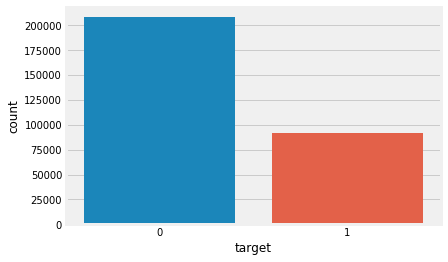

In [10]:
sns.countplot(x="target", data=train_df)

In [11]:
np.round(train_df.target.value_counts()[0]/train_df.target.value_counts()[1],5)

2.26926

# Univariate - Exploring the bin features

In [12]:
for col in ['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4']:
    print(col)
    print(train_df[col].value_counts())

bin_0
0    261749
1     38251
Name: bin_0, dtype: int64
bin_1
0    223018
1     76982
Name: bin_1, dtype: int64
bin_2
0    185033
1    114967
Name: bin_2, dtype: int64
bin_3
T    153535
F    146465
Name: bin_3, dtype: int64
bin_4
Y    191633
N    108367
Name: bin_4, dtype: int64


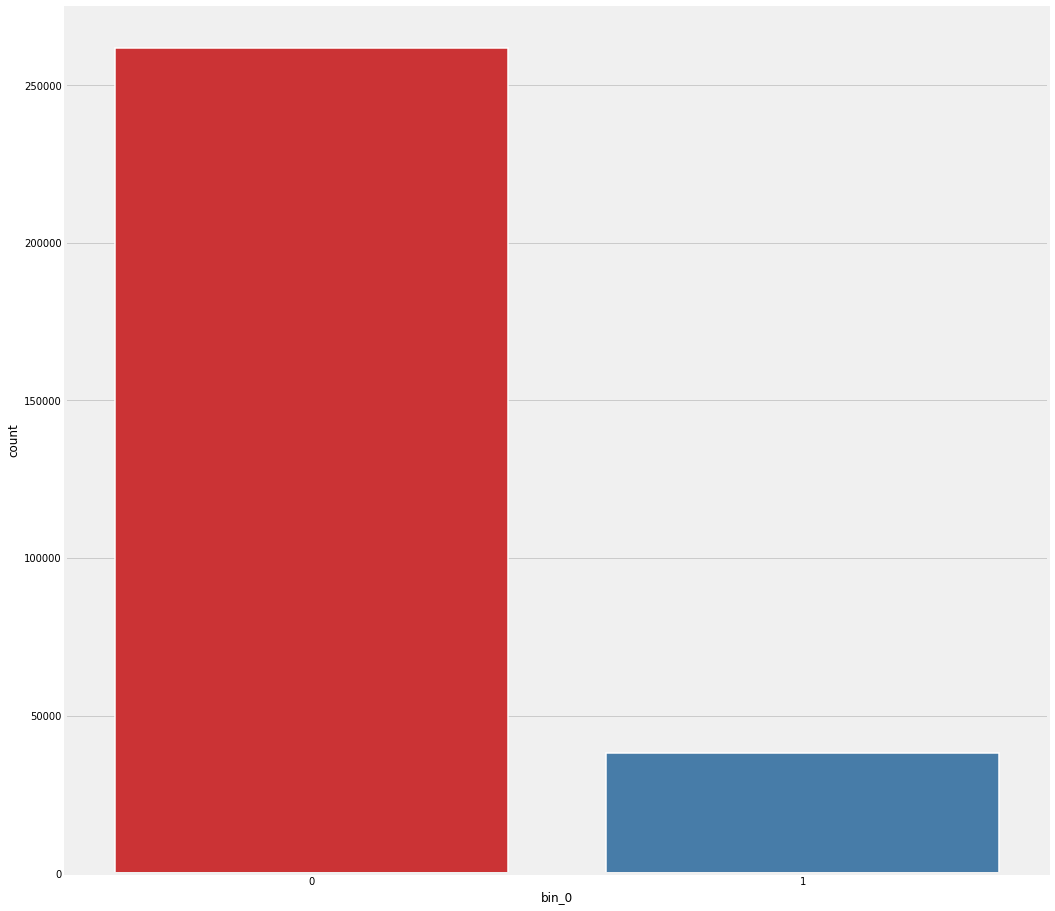

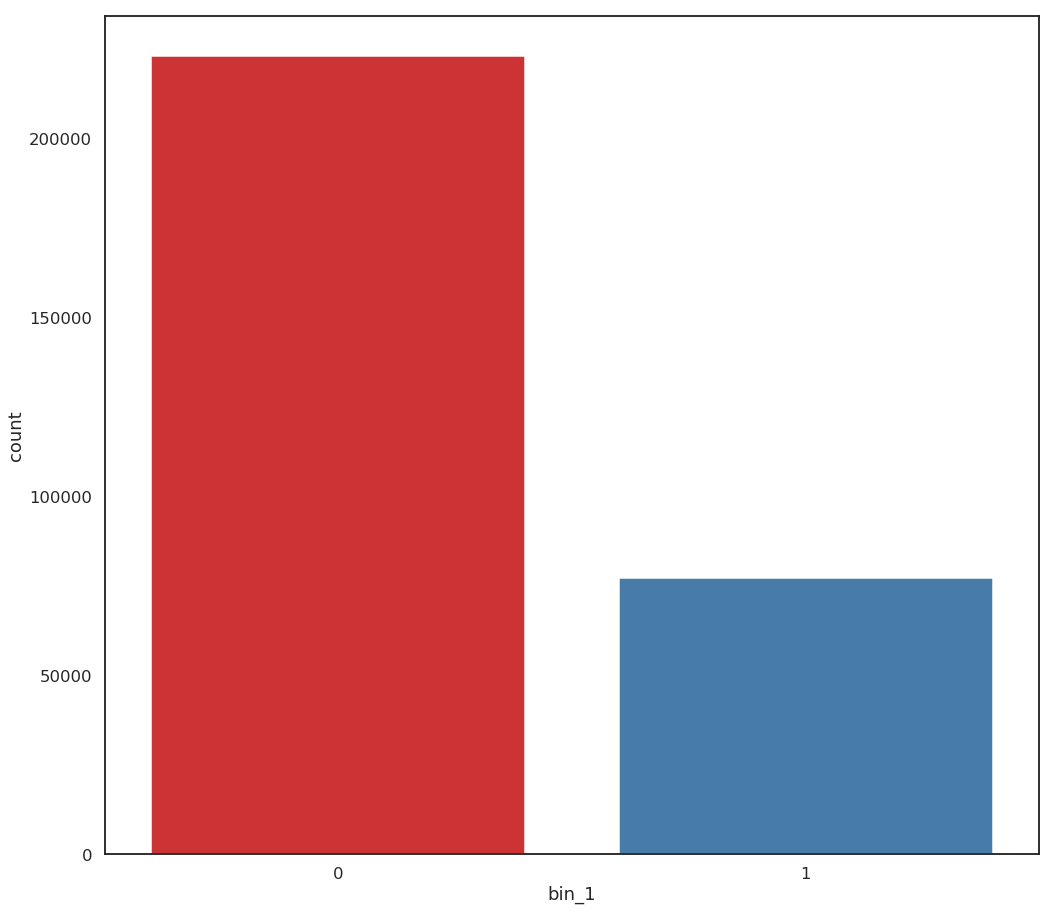

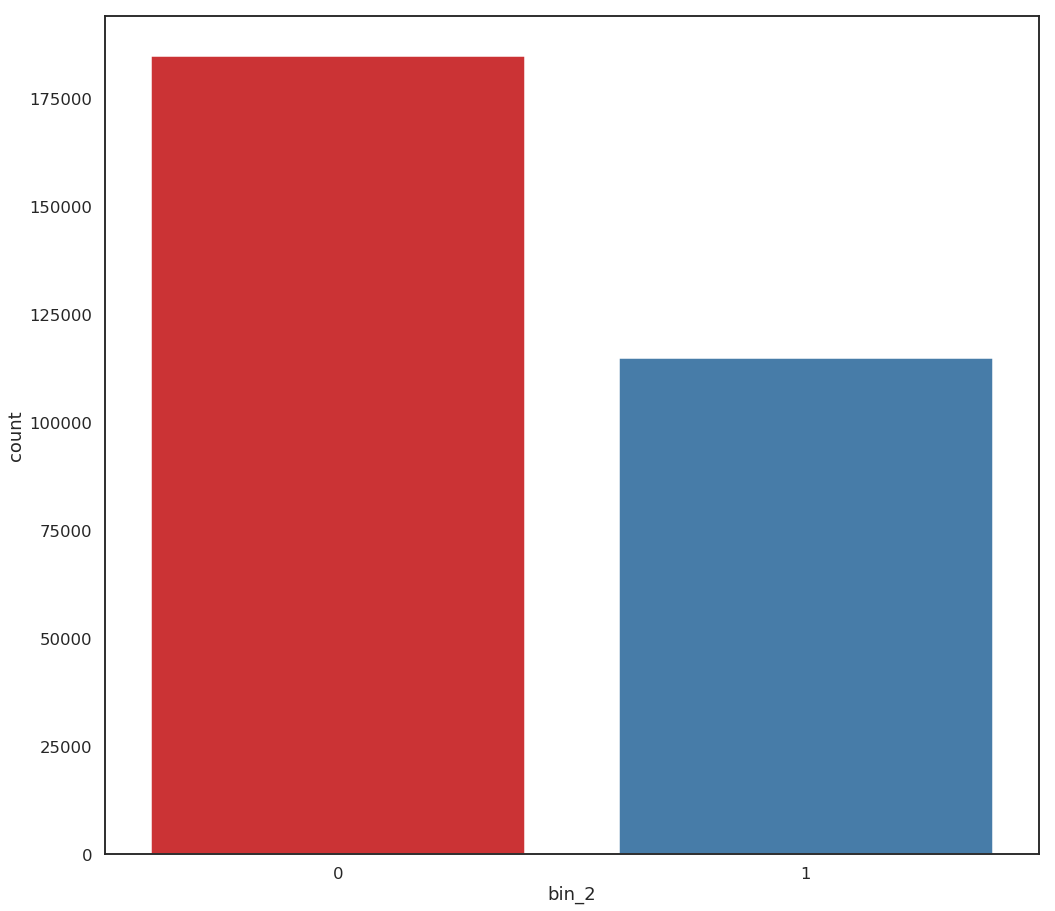

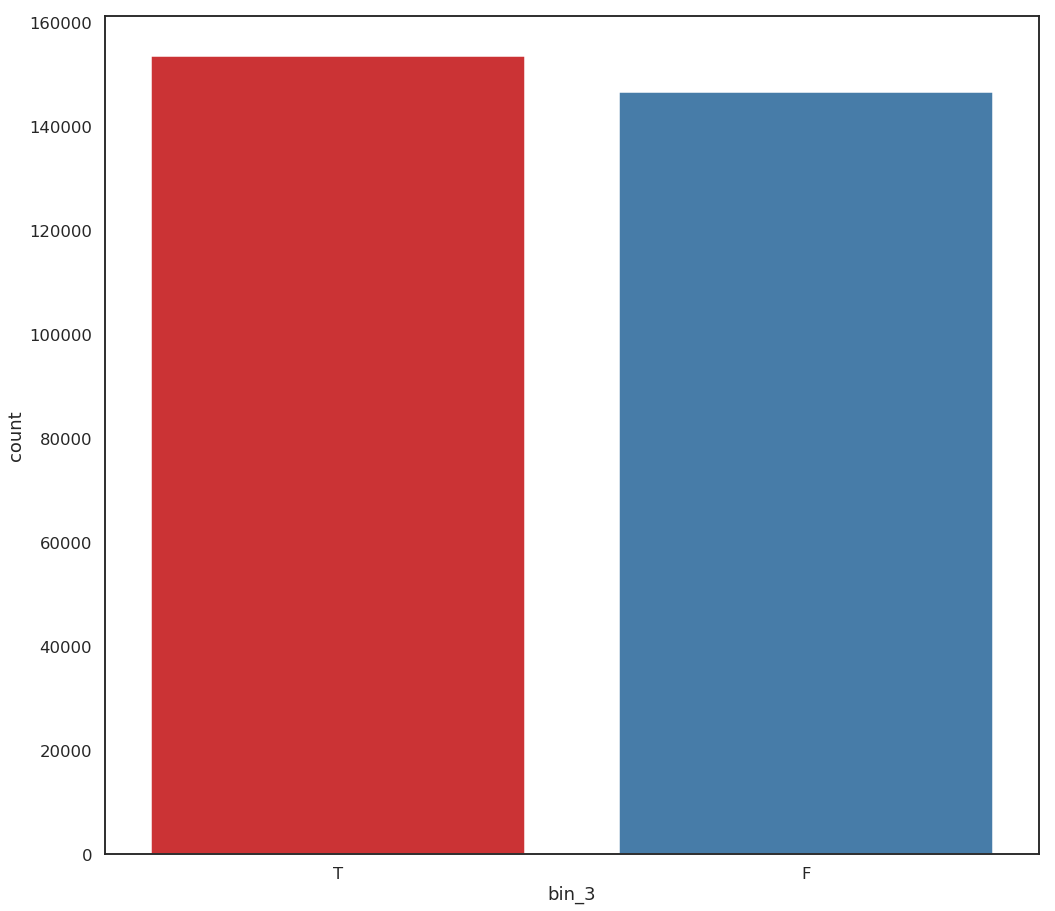

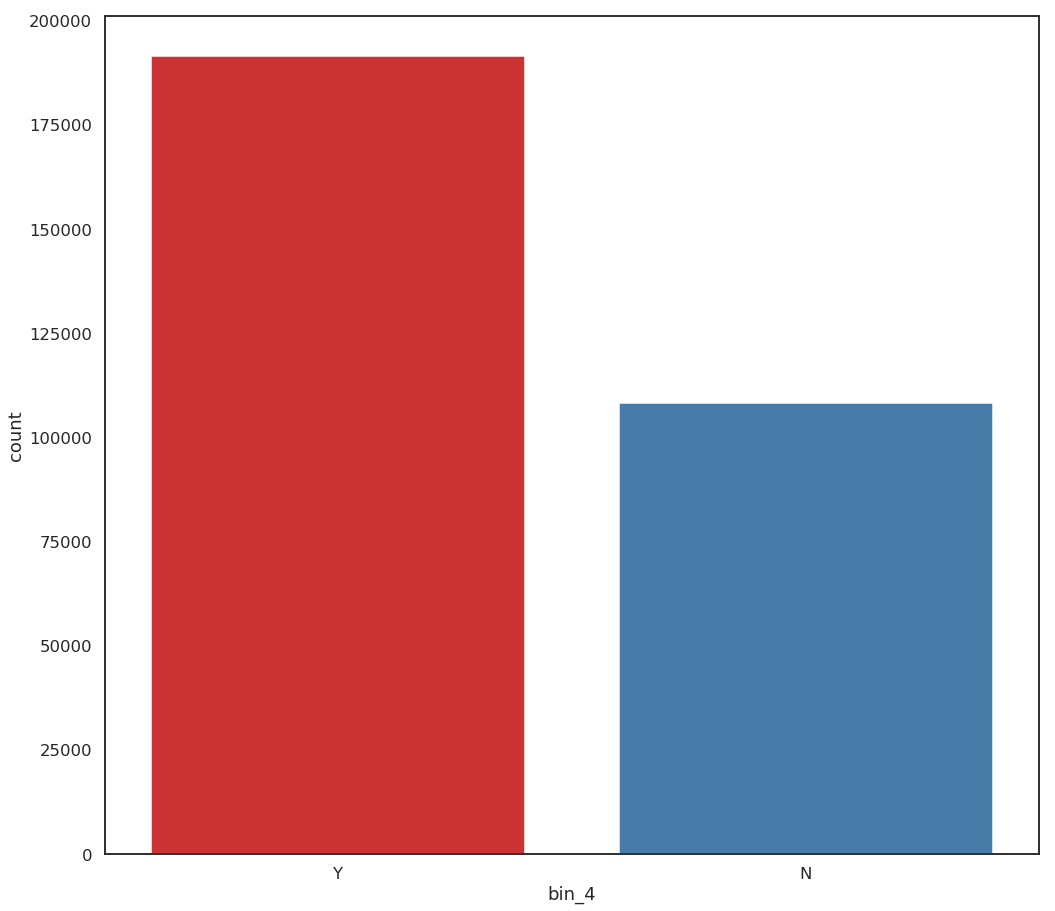

In [13]:
for col in ['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4']:
    
    f, ax = plt.subplots(1, 1, figsize=(15,13))
    
    sns.set(style="white", context="talk")
    
    sns.countplot(x=col, data=train_df, ax=ax, palette="Set1")
    f.tight_layout()

# Univariate - Exploring the nominal features

In [14]:
for col in ['nom_1', 'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6','nom_7', 'nom_8']:
    print(col)
    print(train_df[col].value_counts())

nom_1
Trapezoid    101181
Square        49597
Star          45904
Circle        37320
Polygon       36143
Triangle      29855
Name: nom_1, dtype: int64
nom_2
Lion       101295
Cat         49659
Snake       45979
Dog         37444
Axolotl     36136
Hamster     29487
Name: nom_2, dtype: int64
nom_3
Russia        101123
Canada         49951
China          46044
Finland        36942
Costa Rica     35988
India          29952
Name: nom_3, dtype: int64
nom_4
Oboe        92293
Piano       84517
Bassoon     68448
Theremin    54742
Name: nom_4, dtype: int64
nom_5
f7821e391    2801
06eeaf0aa    2750
472efea17    2729
20b10a832    2725
b97f51ac4    2717
             ... 
91c80026f      64
88f104c00      59
f802a9849      46
1fd0233cd      41
f710fca39      26
Name: nom_5, Length: 222, dtype: int64
nom_6
d173ac7ca    1218
2ed5a94b0    1210
c9eedfbc2    1193
50d7ad46a    1175
0922e3cb8    1169
             ... 
26bf5ddd9      16
28630a5c8      12
8367b78fc      11
e97824431       8
4dcab4fc8       5

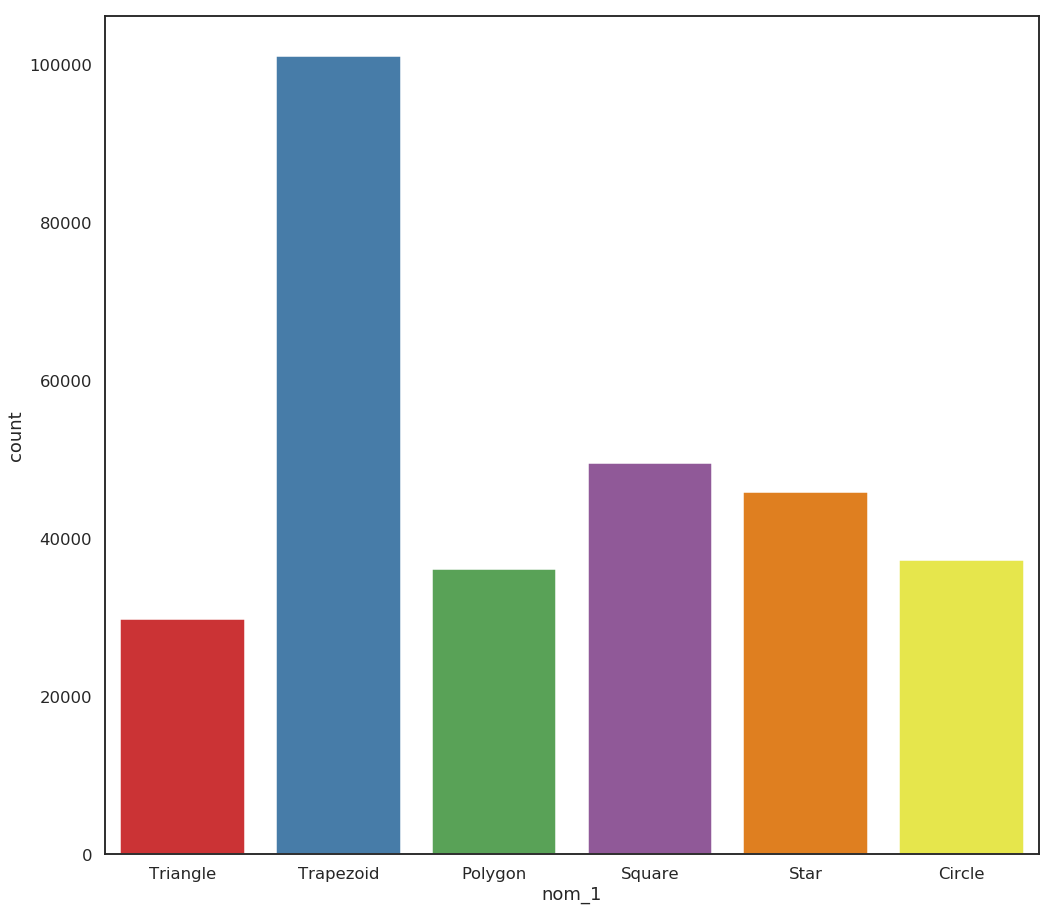

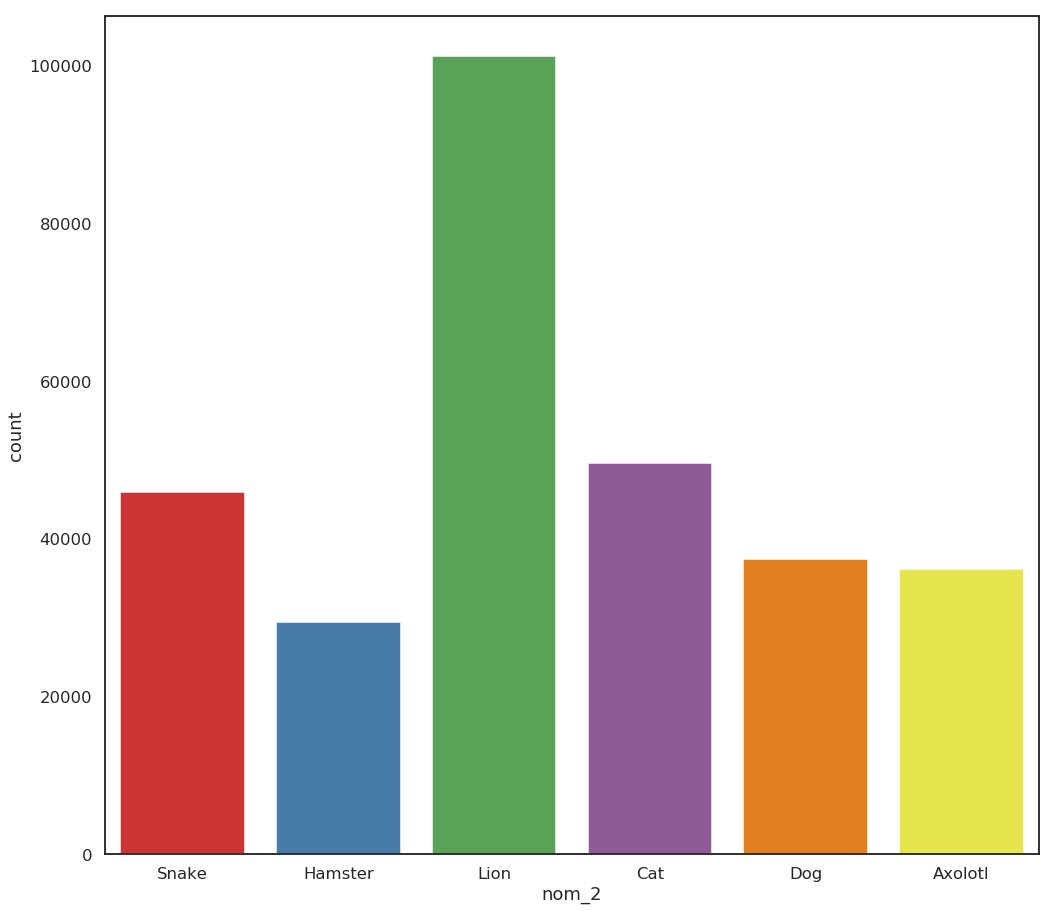

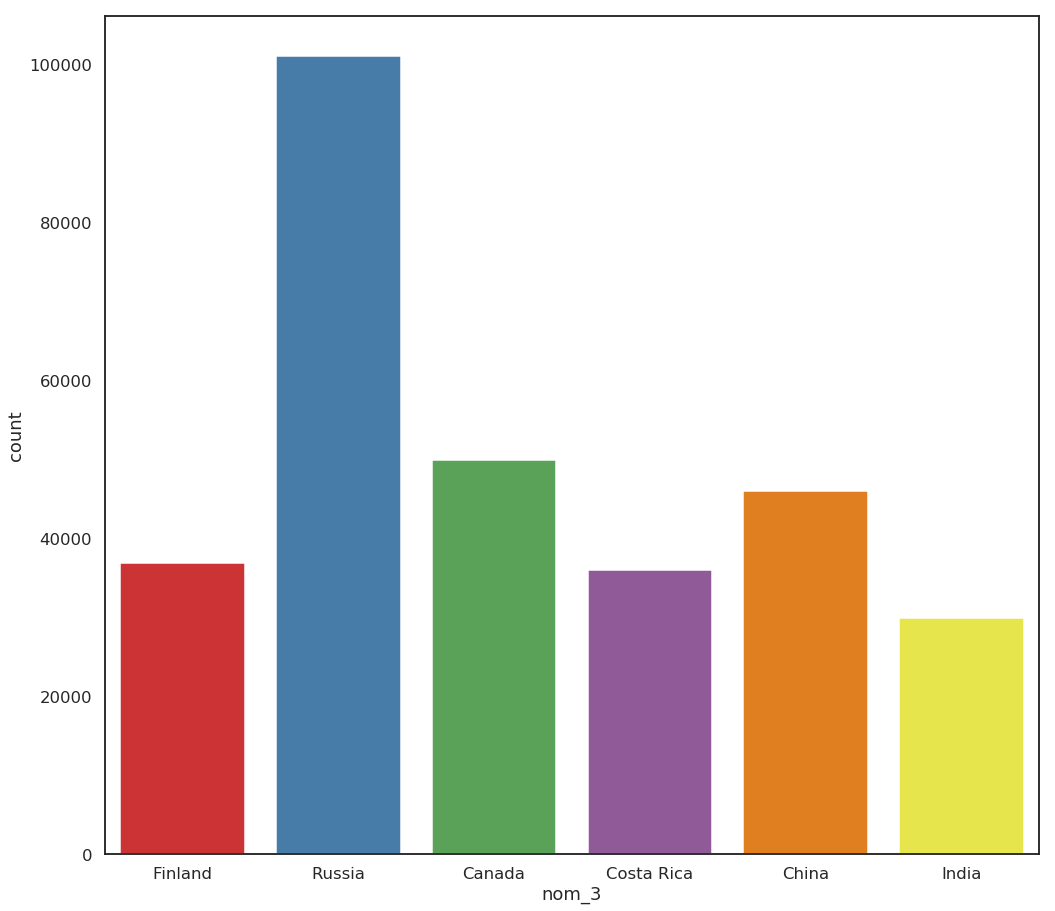

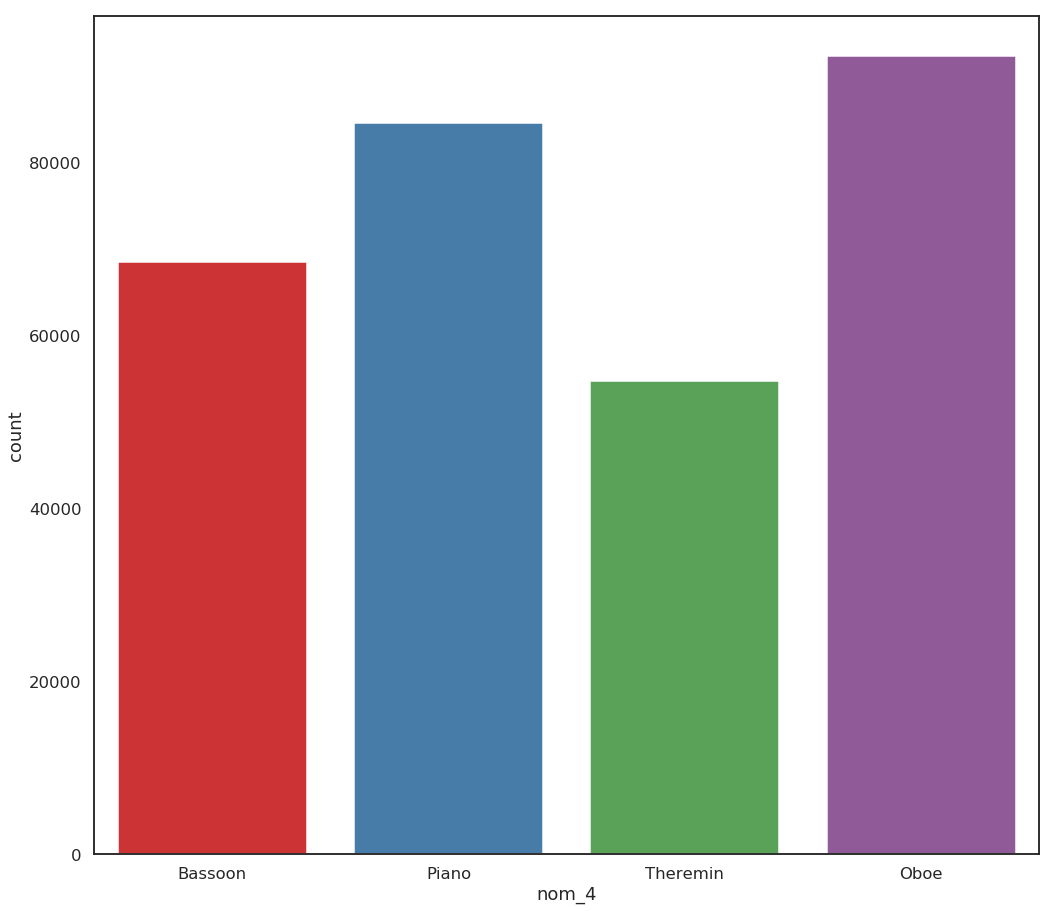

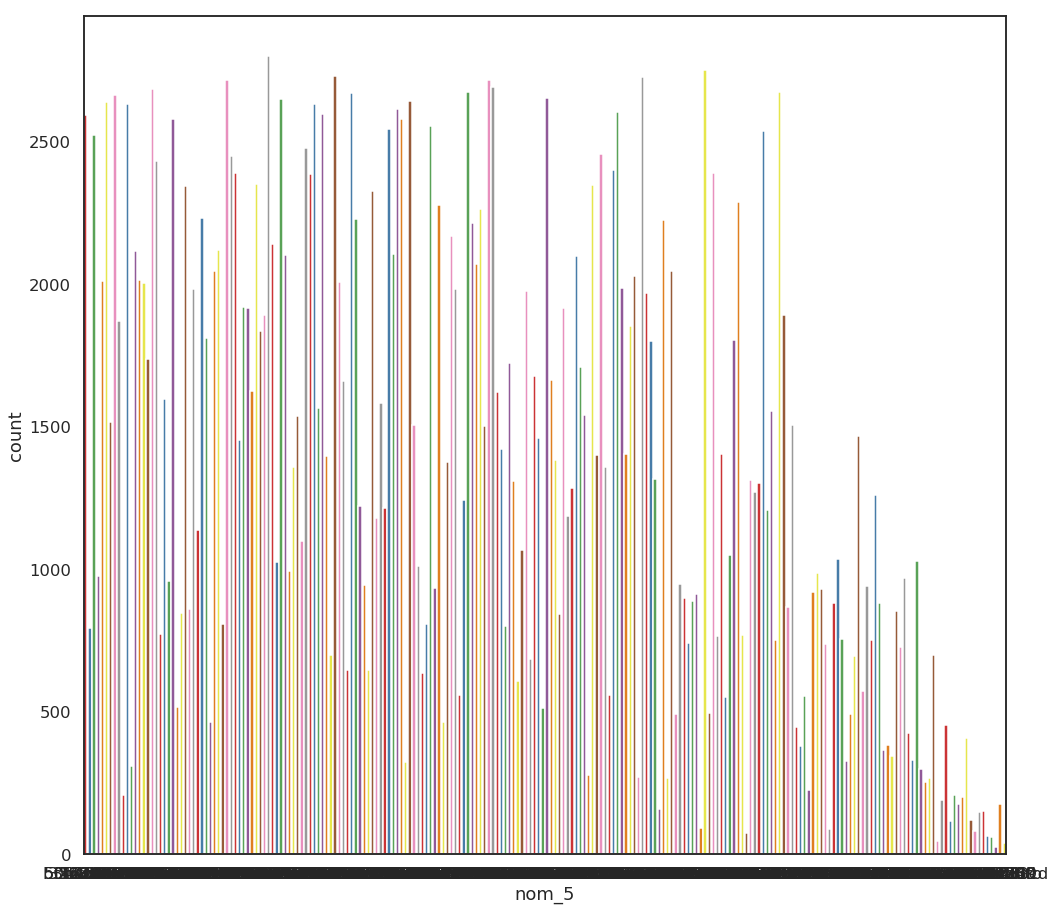

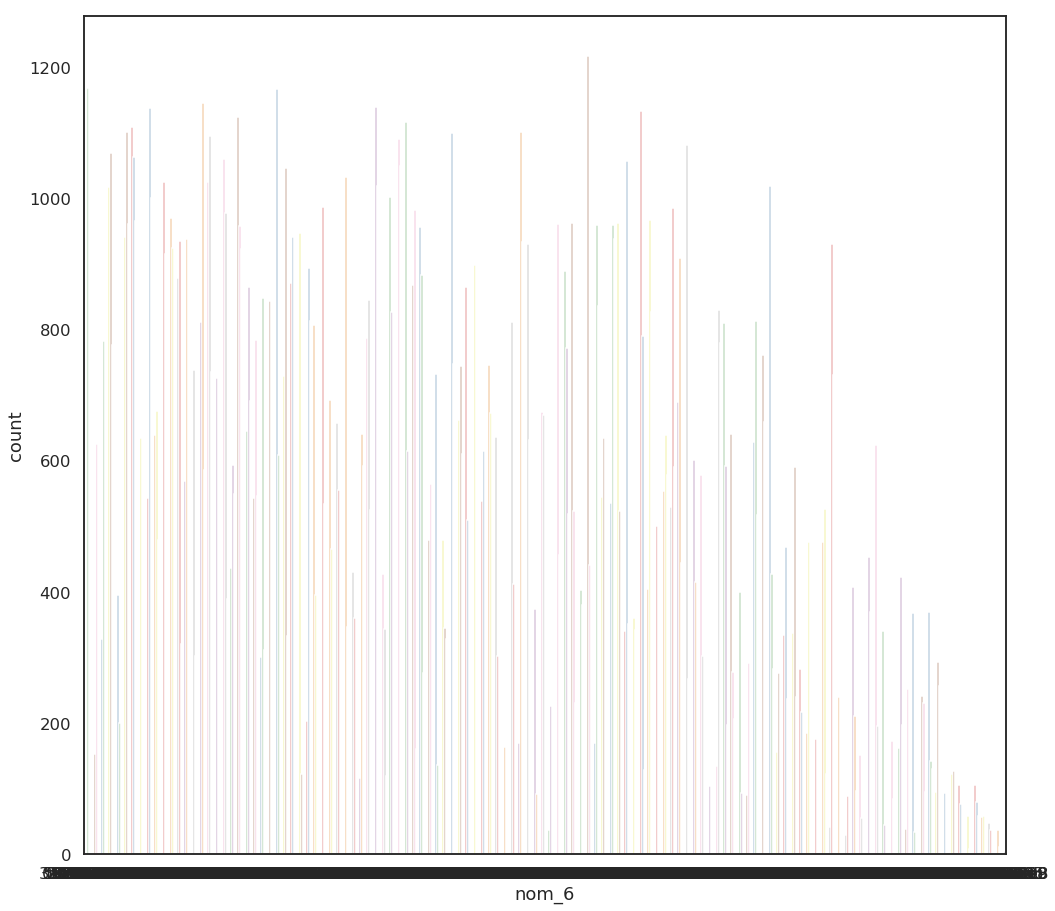

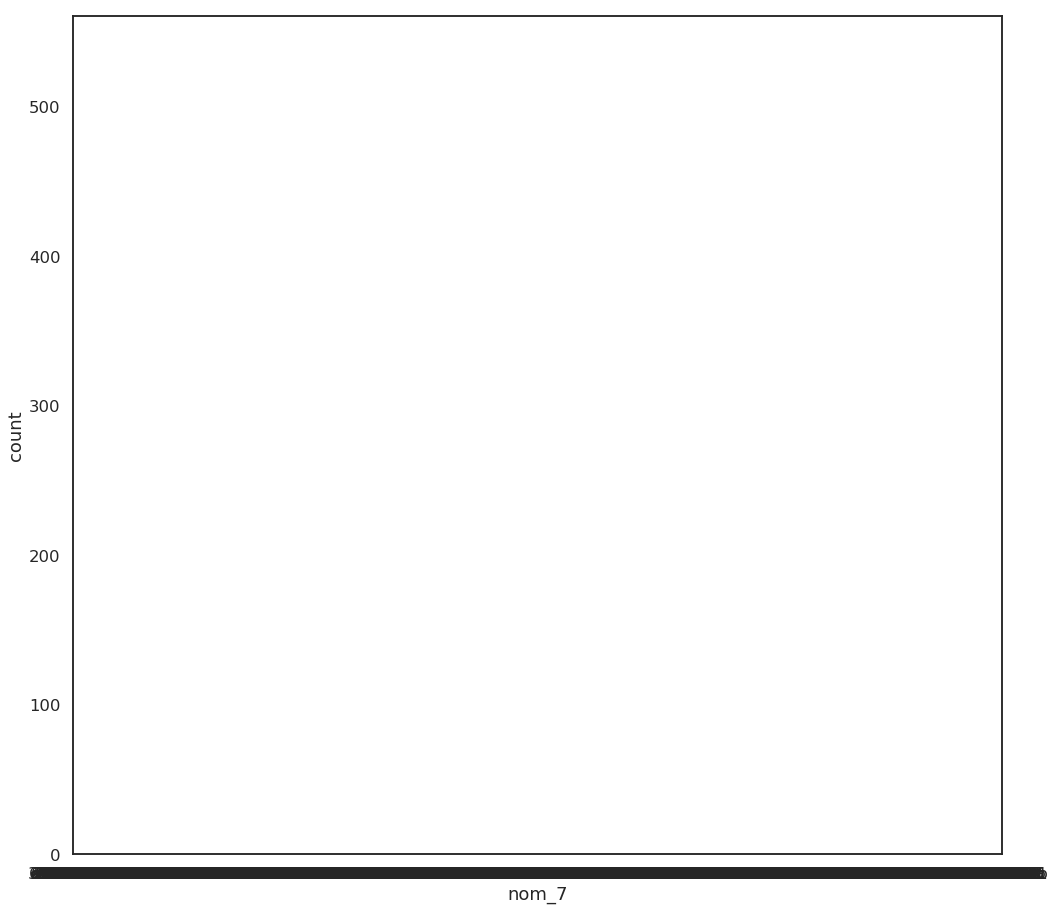

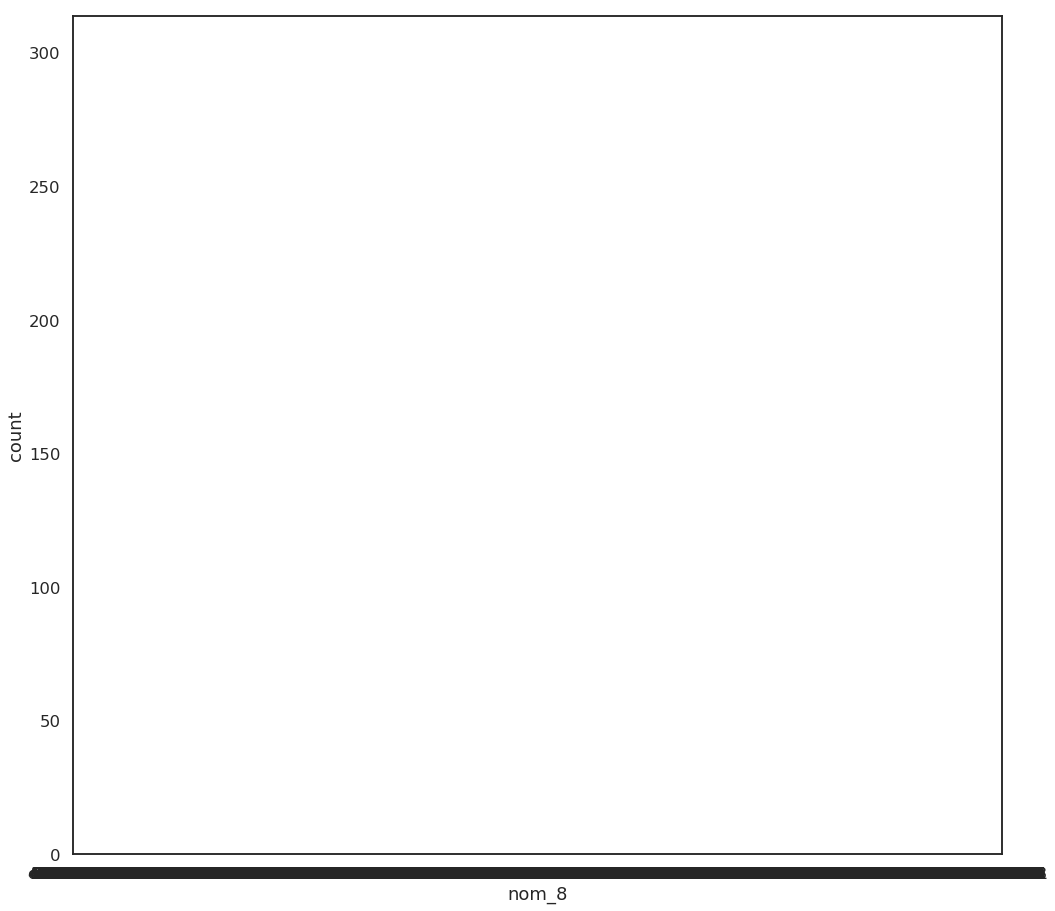

In [15]:
for col in ['nom_1', 'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8']:
    
    f, ax = plt.subplots(1, 1, figsize=(15,13))
    
    
    sns.countplot(x=col, data=train_df, ax=ax, palette="Set1")
    f.tight_layout()

We can see that high cardinality nominal deatures cannot be depicted with seaborn due to the fact that there are many categories.

# Univariate - Exploring the Ordinal Features

In [16]:
for col in ["ord_0", "ord_1", "ord_2", "ord_3", "ord_4", "ord_5"]:
    print(col)
    print(train_df[col].value_counts())

ord_0
1    194846
2     66438
3     38716
Name: ord_0, dtype: int64
ord_1
Novice         126583
Grandmaster     77428
Contributor     42871
Master          28053
Expert          25065
Name: ord_1, dtype: int64
ord_2
Freezing       99816
Lava Hot       63908
Boiling Hot    60627
Cold           33768
Hot            22227
Warm           19654
Name: ord_2, dtype: int64
ord_3
g    36405
l    36124
a    35276
k    28619
i    28048
h    24740
j    24647
f    22384
e    21331
b    11916
o    11320
d     7904
c     6944
n     4014
m      328
Name: ord_3, dtype: int64
ord_4
L    19066
G    18899
S    18875
A    18258
R    16927
Q    15925
K    14698
I    14644
Z    14232
T    14220
V    14143
J    12878
P    12839
U    12775
H    12743
F    11717
E    11303
W     9197
Y     8490
X     6292
B     6169
O     5836
D     3974
C     3575
N     2166
M      159
Name: ord_4, dtype: int64
ord_5
od    5019
fO    3435
Zq    2926
sD    2880
qP    2854
      ... 
eg      47
tv      40
kU      37
vq      35
C

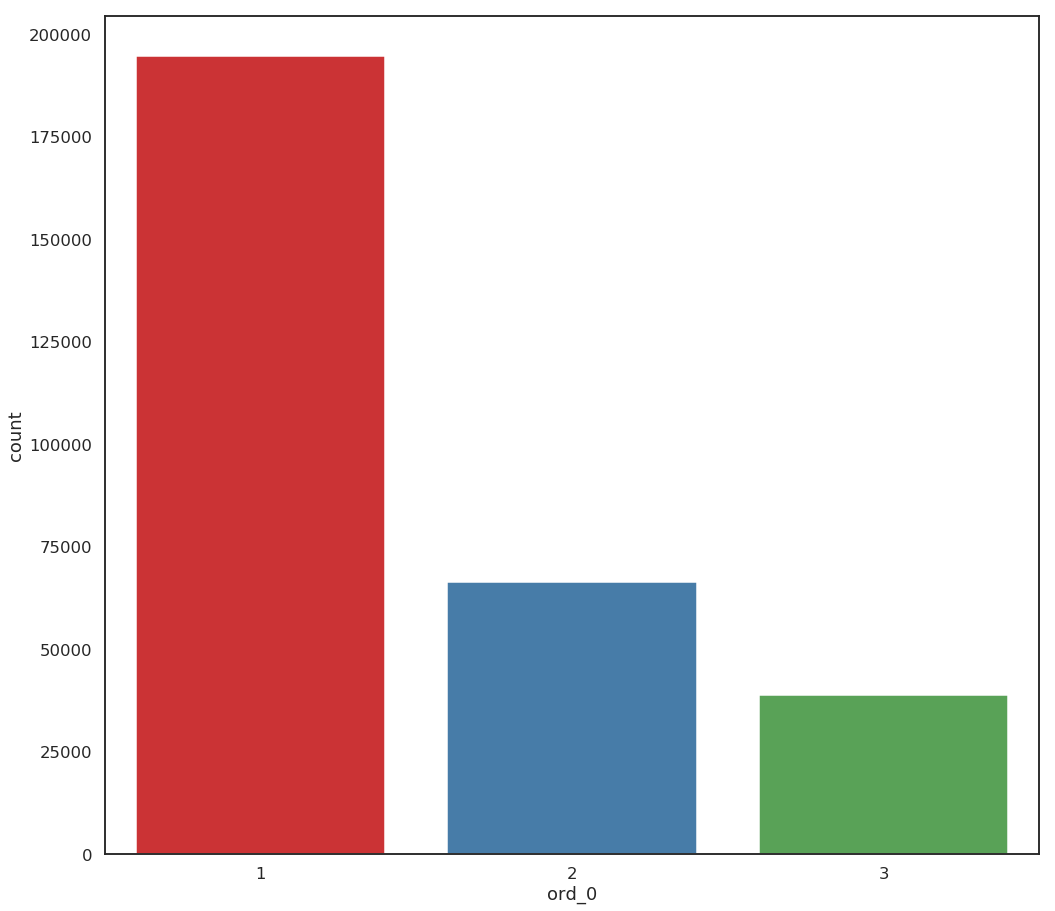

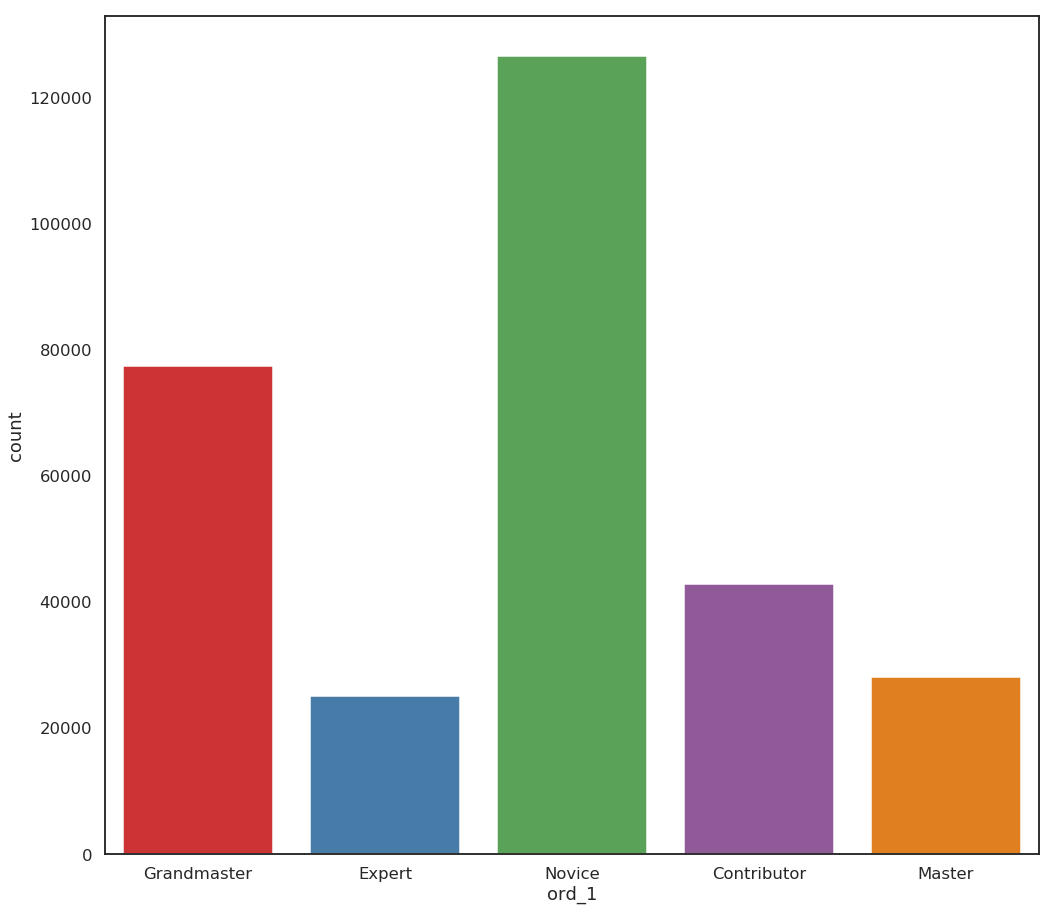

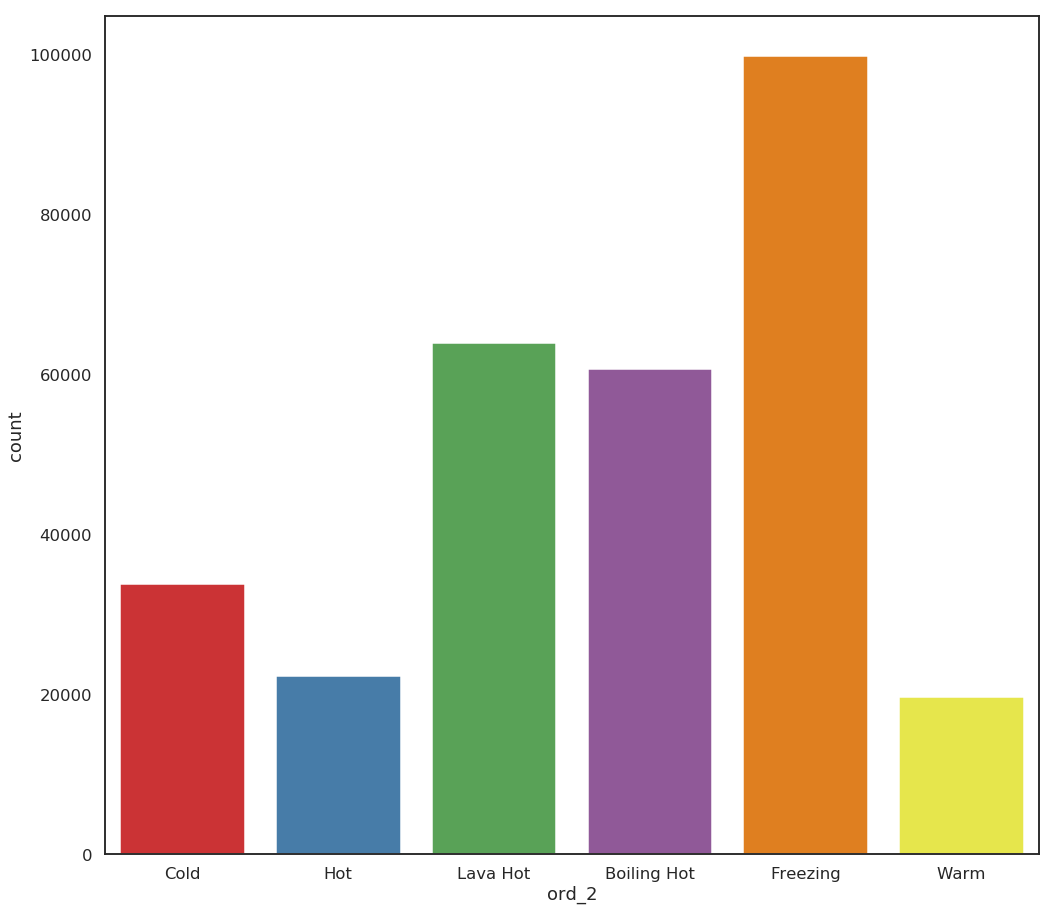

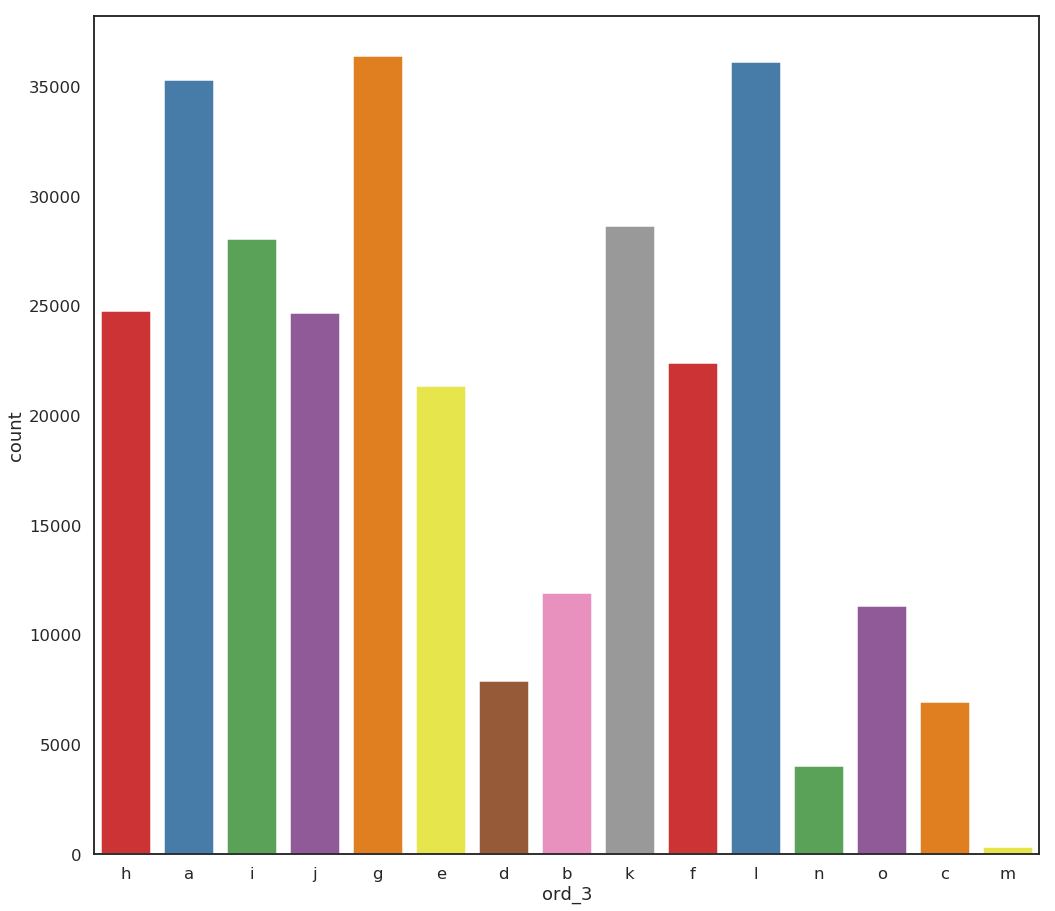

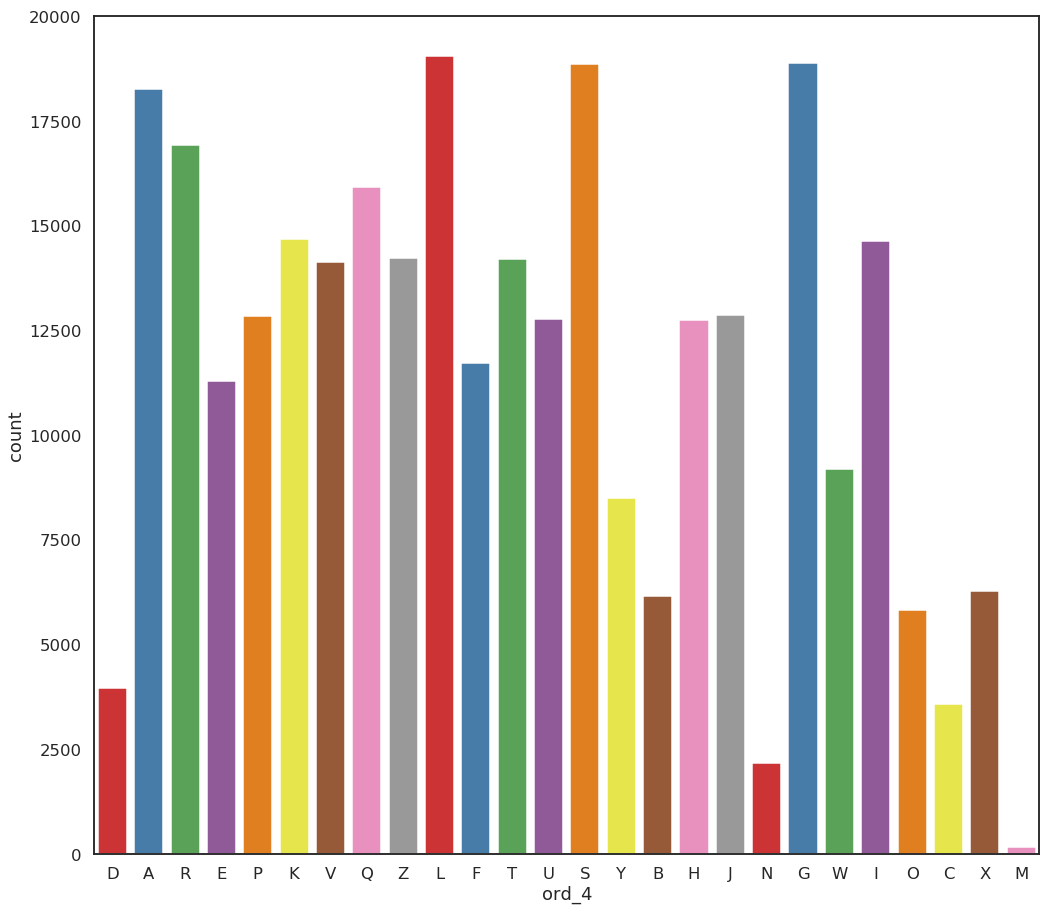

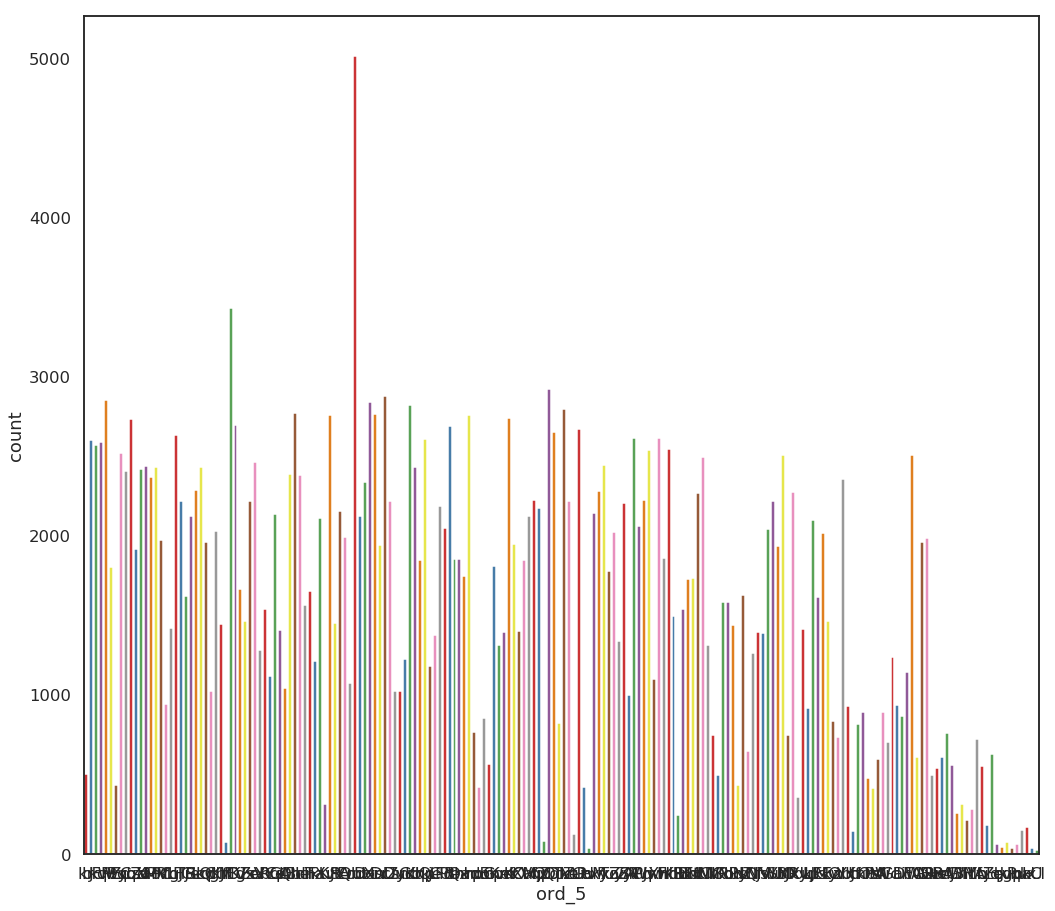

In [17]:
for col in ["ord_0", "ord_1", "ord_2", "ord_3", "ord_4", "ord_5"]:
    
    f, ax = plt.subplots(1, 1, figsize=(15,13))
    
    sns.countplot(x=col, data=train_df, ax=ax, palette="Set1")
    f.tight_layout()

In [18]:
import gc
gc.collect();

# Feature Engineering for Binary features

In [19]:
train_df.loc[train_df['bin_3'] == 'T', 'bin_3'] = 1
train_df.loc[train_df['bin_3'] == 'F', 'bin_3'] = 0

test_df.loc[test_df['bin_3'] == 'T', 'bin_3'] = 1
test_df.loc[test_df['bin_3'] == 'F', 'bin_3'] = 0

train_df.loc[train_df['bin_4'] == 'Y', 'bin_4'] = 1
train_df.loc[train_df['bin_4'] == 'N', 'bin_4'] = 0

test_df.loc[test_df['bin_4'] == 'Y', 'bin_4'] = 1
test_df.loc[test_df['bin_4'] == 'N', 'bin_4'] = 0

# Feature Engineering for Nominal Features

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

columns = ['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9']

for col in columns:
    
    le.fit(train_df[col].to_list()+test_df[col].to_list())
    train_df[col] = le.transform(train_df[col])
    test_df[col] = le.transform(test_df[col])

# Feature Engineering for Ordinal Features
I will use the one hot encoding method

In [21]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import gc

for col in ["ord_0", "ord_1", "ord_2", "ord_3", "ord_4", "ord_5"]:
    
    print(col, "one-hot-encoding")
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    test_df[col] = le.transform(test_df[col])

    
    ohe = OneHotEncoder()
    train_col = ohe.fit_transform(train_df[col].values.reshape(-1,1)).toarray()
    test_col = ohe.fit_transform(test_df[col].values.reshape(-1,1)).toarray()

    dfOneHot = pd.DataFrame(train_col, columns = [col+"."+str(int(i)) for i in range(train_col.shape[1])])
    train_df = pd.concat([train_df, dfOneHot], axis=1)

    dfOneHot = pd.DataFrame(test_col, columns = [col+"."+str(int(i)) for i in range(test_col.shape[1])])
    test_df = pd.concat([test_df, dfOneHot], axis=1)

    train_df.drop(col, axis=1, inplace=True);
    test_df.drop(col, axis=1, inplace=True);
    
    del train_col; del test_col; del dfOneHot;
    gc.collect();

ord_0 one-hot-encoding
ord_1 one-hot-encoding
ord_2 one-hot-encoding
ord_3 one-hot-encoding
ord_4 one-hot-encoding
ord_5 one-hot-encoding


In [22]:
train_df.columns

Index(['id', 'bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_0', 'nom_1',
       'nom_2', 'nom_3',
       ...
       'ord_5.182', 'ord_5.183', 'ord_5.184', 'ord_5.185', 'ord_5.186',
       'ord_5.187', 'ord_5.188', 'ord_5.189', 'ord_5.190', 'ord_5.191'],
      dtype='object', length=266)

In [23]:
train_df.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,ord_5.182,ord_5.183,ord_5.184,ord_5.185,ord_5.186,ord_5.187,ord_5.188,ord_5.189,ord_5.190,ord_5.191
0,0,0,0,0,1,1,1,5,5,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,1,0,1,1,1,4,3,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0,0,0,0,1,0,4,4,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0,1,0,0,1,2,4,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0,0,0,0,0,2,4,4,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
train_df.describe()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,ord_5.182,ord_5.183,ord_5.184,ord_5.185,ord_5.186,ord_5.187,ord_5.188,ord_5.189,ord_5.190,ord_5.191
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,...,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,149999.500000,0.127503,0.256607,0.383223,0.511783,0.638777,0.934423,2.756827,2.826943,2.847563,...,0.000117,0.007353,0.007397,0.001453,0.000253,0.007597,0.002160,0.002443,0.004097,0.007867
std,86602.684716,0.333537,0.436761,0.486173,0.499862,0.480356,0.755799,1.563023,1.670861,1.912415,...,0.010801,0.085436,0.085685,0.038095,0.015914,0.086827,0.046426,0.049370,0.063874,0.088345
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74999.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,149999.500000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,3.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,224999.250000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,4.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,299999.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,5.000000,5.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Machine Learning Training

![](https://www.zirous.com/wp-content/uploads/2019/01/Word-Cloud-02.png)
[image-source](https://www.zirous.com/wp-content/uploads/2019/01/Word-Cloud-02.png)

In [25]:
train_columns = train_df.columns.to_list()

In [26]:
for elem in ["id","target"]:
    train_columns.remove(elem)

In [27]:
y = train_df['target']
X = train_df.drop(['target'], axis=1)
X = X[train_columns]

clf_stats_df = pd.DataFrame(columns=["clf_name", "F1-score", "auc-score"])  

# XGBoost with default parameters


Stratified Fold: 0

[0]	validation_0-auc:0.618279	validation_1-auc:0.617659
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[250]	validation_0-auc:0.762247	validation_1-auc:0.748187
[500]	validation_0-auc:0.780254	validation_1-auc:0.759774
[750]	validation_0-auc:0.790482	validation_1-auc:0.764466
[1000]	validation_0-auc:0.797607	validation_1-auc:0.766749
[1250]	validation_0-auc:0.803545	validation_1-auc:0.768354
[1500]	validation_0-auc:0.809544	validation_1-auc:0.769836
[1750]	validation_0-auc:0.814924	validation_1-auc:0.770987
[2000]	validation_0-auc:0.82036	validation_1-auc:0.772379
[2250]	validation_0-auc:0.825189	validation_1-auc:0.773191
[2500]	validation_0-auc:0.829965	validation_1-auc:0.774134
[2750]	validation_0-auc:0.834769	validation_1-auc:0.774876
[3000]	validation_0-auc:0.8391	validation_1-auc:0.775385
[3250]	validation_0-auc:0.843116	validation_1-auc:0.775683
Stop

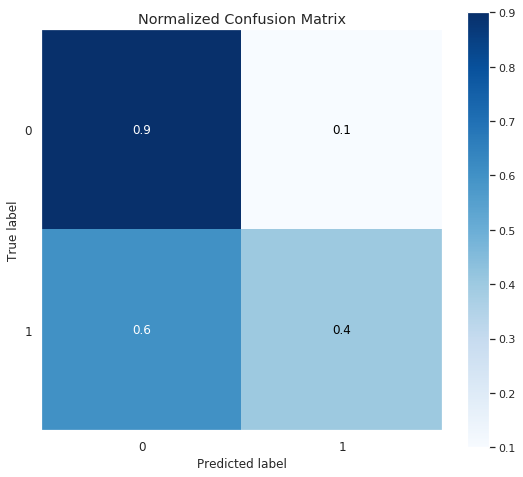

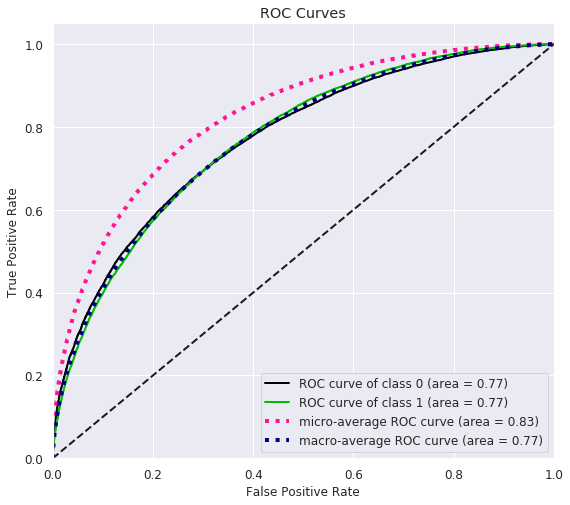

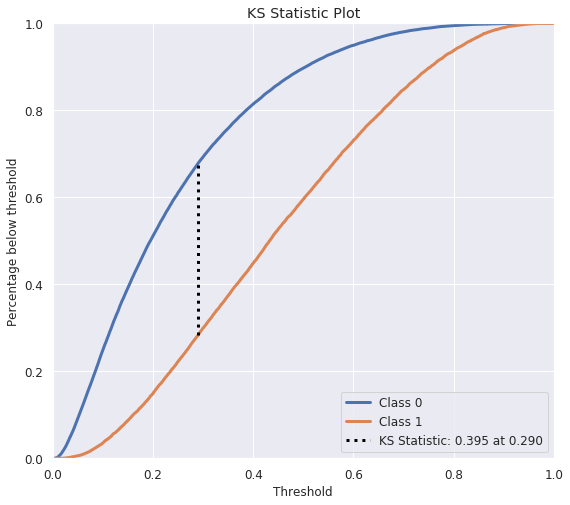

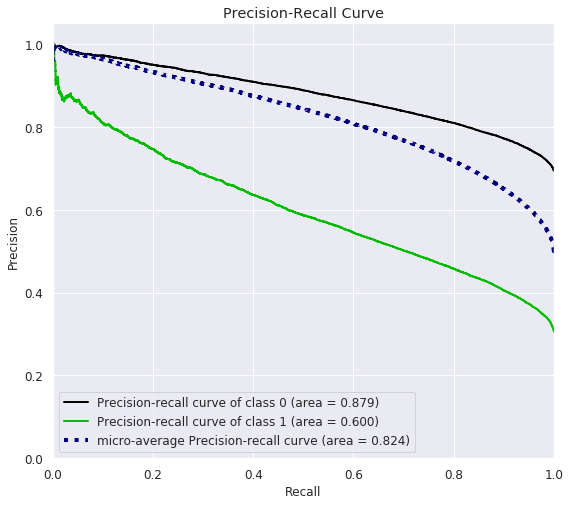

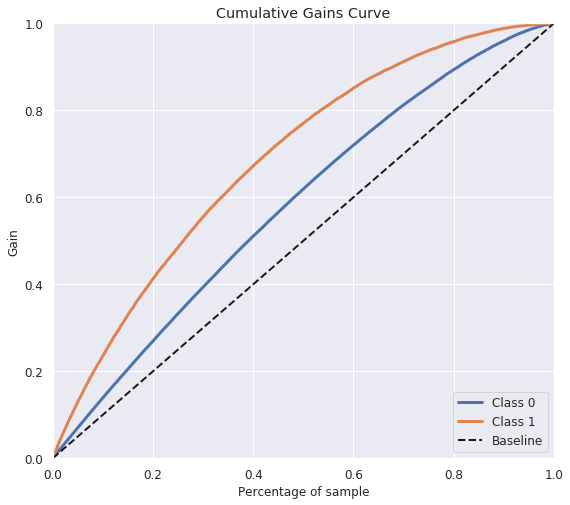

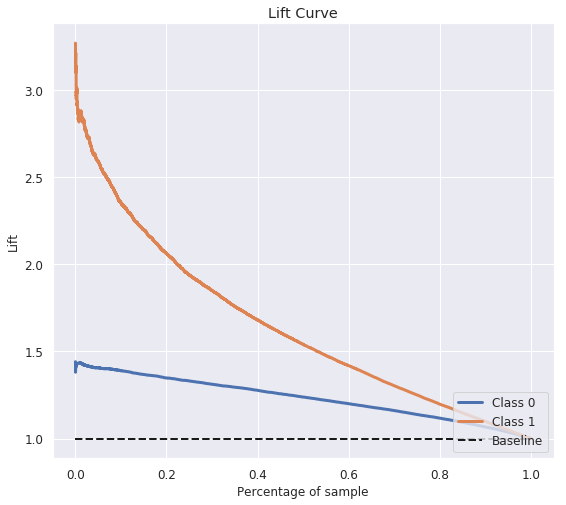

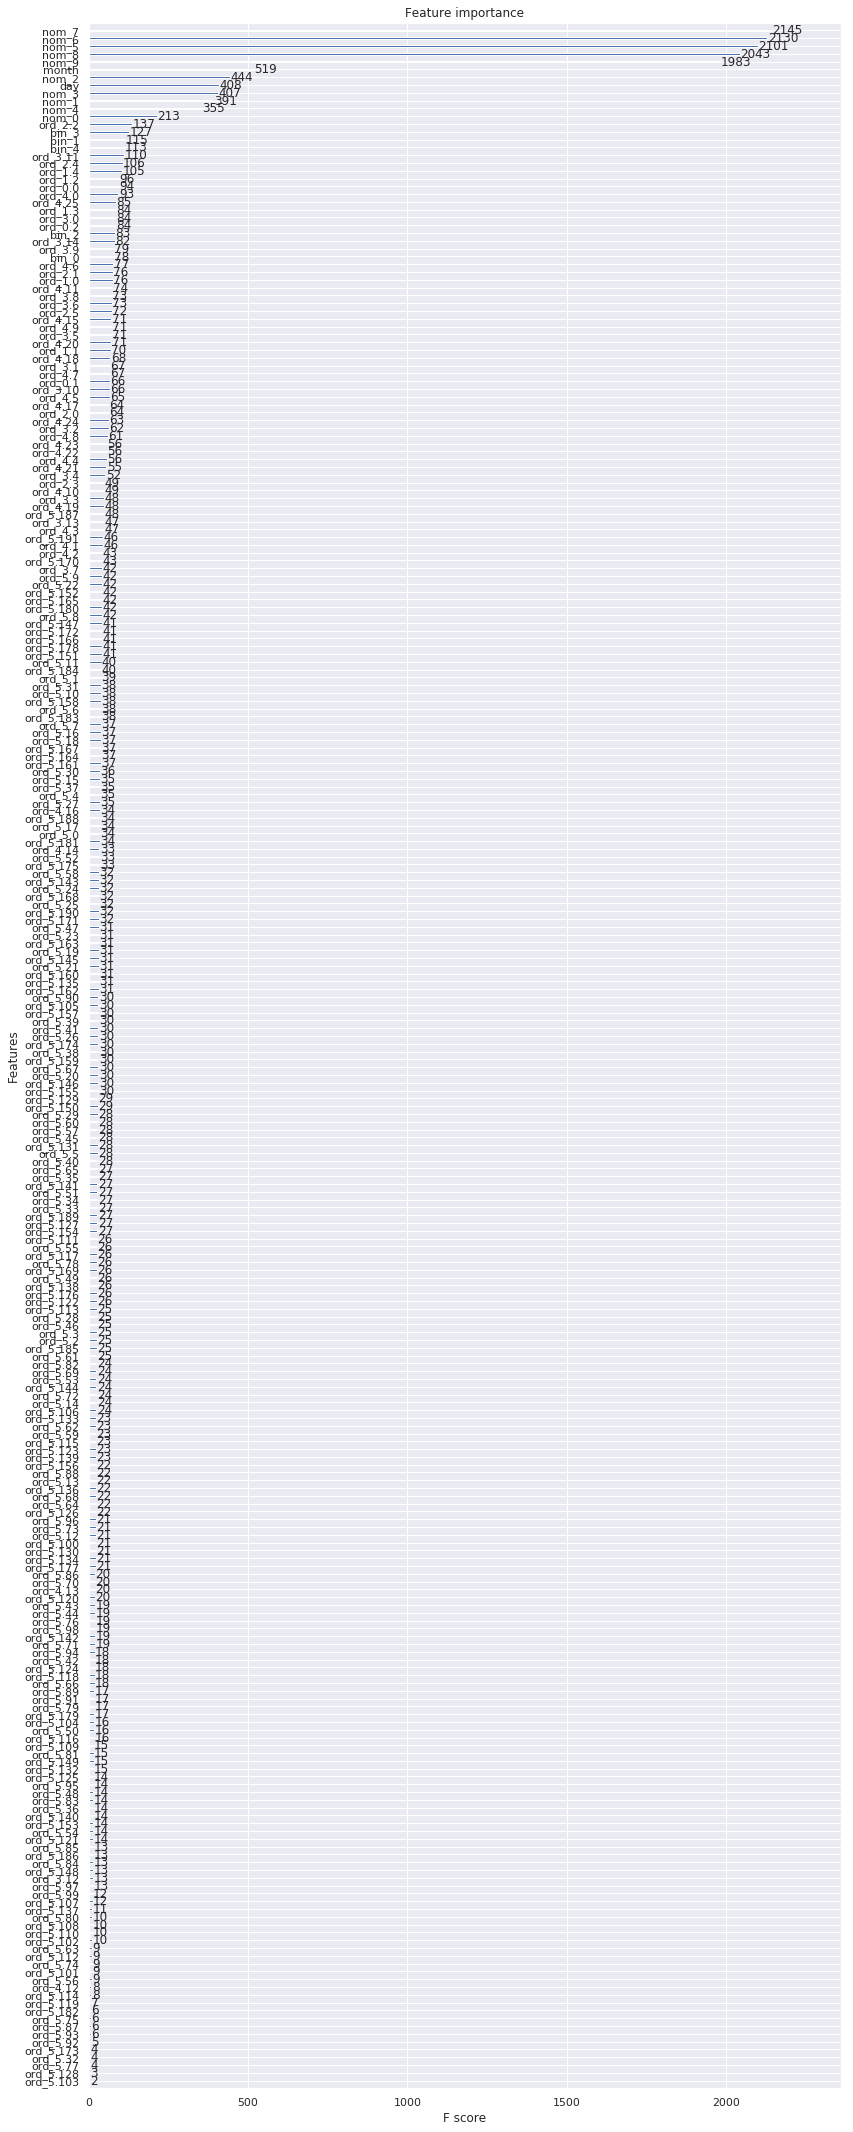

In [28]:
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import time
import seaborn as sns
import scikitplot as skplt

# create a 80/20 split of the data 
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, test_size=0.2, stratify = y)

import xgboost as xgb

start_time = time.time()

predictions_probas_list = np.zeros([len(yvalid), 2])
predictions_test = np.zeros(len(test_df))
num_of_folds = 2
num_fold = 0
    #feature_importance_df = pd.DataFrame()

folds = StratifiedKFold(n_splits=num_of_folds, shuffle=False, random_state = 42)

for train_index, valid_index in folds.split(xtrain, ytrain):
    xtrain_stra, xvalid_stra = xtrain.iloc[train_index,:], xtrain.iloc[valid_index,:]
    ytrain_stra, yvalid_stra = ytrain.iloc[train_index], ytrain.iloc[valid_index]

    print()
    print("Stratified Fold:", num_fold)
    num_fold = num_fold + 1
    print()

    clf_stra_xgb = xgb.XGBClassifier(n_estimators = 4000,
                                     objective= 'binary:logistic',
                                     nthread=-1,
                                     seed=42)

    clf_stra_xgb.fit(xtrain_stra, ytrain_stra, eval_set=[(xtrain_stra, ytrain_stra), (xvalid_stra, yvalid_stra)], 
                early_stopping_rounds=100, eval_metric='auc', verbose=250)

    #fold_importance_df = pd.DataFrame()
    #fold_importance_df["feature"] = pd.DataFrame.from_dict(data=clf_stra_xgb.get_fscore(), orient="index", columns=["FScore"])["FScore"].index
    #fold_importance_df["fscore"] = pd.DataFrame.from_dict(data=clf_stra_xgb.get_fscore(), orient="index", columns=["FScore"])["FScore"].values
    #fold_importance_df["fold"] = n_fold + 1
    #feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

    predictions = clf_stra_xgb.predict(xvalid)
    predictions_probas = clf_stra_xgb.predict_proba(xvalid)
    predictions_probas_list += predictions_probas/num_of_folds

    predictions_test += clf_stra_xgb.predict_proba(test_df[xtrain.columns])[:,1]/num_of_folds


predictions = np.argmax(predictions_probas, axis=1)

print()
print(classification_report(yvalid, predictions))

print()
print("CV f1_score", f1_score(yvalid, predictions, average = "macro"))

print()
print("CV roc_auc_score", roc_auc_score(yvalid, predictions_probas_list[:,1], average = "macro"))

print()
print("elapsed time in seconds: ", time.time() - start_time)

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, predictions, normalize=True)

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_roc(yvalid, predictions_probas)

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_ks_statistic(yvalid, predictions_probas)

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_precision_recall(yvalid, predictions_probas)

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_cumulative_gain(yvalid, predictions_probas)

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_lift_curve(yvalid, predictions_probas)

sns.set(rc={'figure.figsize':(12, 38)})
xgb.plot_importance(clf_stra_xgb, title='Feature importance', xlabel='F score', ylabel='Features')

clf_stats_df = clf_stats_df.append({"clf_name": "clf_stra_xgb",
                     "F1-score":f1_score(yvalid, predictions, average = "macro"),
                     "auc-score": roc_auc_score(yvalid, predictions_probas_list[:,1], average = "macro")}, ignore_index=True)

print()
import gc
gc.collect();

# HyperOpt Tuning for XGBoost

In [29]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, stratify = y, random_state=42, test_size=0.2)

# https://github.com/hyperopt/hyperopt/wiki/FMin

def objective(space):

    clf = xgb.XGBClassifier(n_estimators = 2000,
                            max_depth = int(space['max_depth']),
                            min_child_weight = space['min_child_weight'],
                            subsample = space['subsample'],
                            gamma=space['gamma'],
                            colsample_bytree=space['colsample_bytree'],
                            reg_alpha = space['reg_alpha'],
                            reg_lambda = space['reg_lambda'],
                            scale_pos_weight = space["scale_pos_weight"],
                            objective= 'binary:logistic',
                            nthread=-1,
                            seed=42)

    eval_set  = [( xtrain, ytrain), ( xvalid, yvalid)]

    clf.fit(xtrain, ytrain,
            eval_set=eval_set, eval_metric="auc",
            early_stopping_rounds=100, verbose=100)

    pred = clf.predict_proba(xvalid)[:,1]
    auc = roc_auc_score(yvalid, pred)
    print("SCORE:", auc)

    return{'loss':1-auc, 'status': STATUS_OK }

# https://xgboost.readthedocs.io/en/latest/parameter.html#parameters-for-tree-booster
space ={
        'eta': hp.uniform('eta', 0.025, 0.5),
        'max_depth': hp.uniform('max_depth', 3, 12),
        'min_child_weight': hp.quniform ('min_child_weight', 1, 10, 1),
        'subsample': hp.uniform ('subsample', 0.5, 1),
        'gamma': hp.uniform('gamma', 0.1, 1),
        'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1, 0.05),
        'reg_alpha': hp.uniform ('reg_alpha', 0, 1),
        'reg_lambda': hp.uniform ('reg_lambda', 0, 10),
        'scale_pos_weight': hp.uniform("scale_pos_weight", 1, np.round(train_df.target.value_counts()[0]/train_df.target.value_counts()[1],5))
    }


trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=2,
            trials=trials,
            verbose = 0)

print(best)

[0]	validation_0-auc:0.609953	validation_1-auc:0.60702

Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.


Will train until validation_1-auc hasn't improved in 100 rounds.

[100]	validation_0-auc:0.731113	validation_1-auc:0.723647

[200]	validation_0-auc:0.750407	validation_1-auc:0.740855

[300]	validation_0-auc:0.760825	validation_1-auc:0.749308

[400]	validation_0-auc:0.7675	validation_1-auc:0.754587

[500]	validation_0-auc:0.772238	validation_1-auc:0.758183

[600]	validation_0-auc:0.77579	validation_1-auc:0.76045

[700]	validation_0-auc:0.778728	validation_1-auc:0.762369

[800]	validation_0-auc:0.781	validation_1-auc:0.763666

[900]	validation_0-auc:0.783489	validation_1-auc:0.765167

[1000]	validation_0-auc:0.78543	validation_1-auc:0.766252

[1100]	validation_0-auc:0.787428	validation_1-auc:0.767286

[1200]	validation_0-auc:0.789047	validation_1-auc:0.767856

[1300]	validation_0-auc:0.791287	validation_1-auc:0.769117

[1400]	validation_0-a

In [30]:
import gc
gc.collect();

In [31]:
best

{'colsample_bytree': 0.75,
 'eta': 0.43630526071601095,
 'gamma': 0.22357758626295643,
 'max_depth': 3.956670421954388,
 'min_child_weight': 2.0,
 'reg_alpha': 0.9646902835658179,
 'reg_lambda': 0.526053250723777,
 'scale_pos_weight': 2.133605612071298,
 'subsample': 0.7455661808526597}

# XGBoost Training after Tuning


Stratified Fold: 0

[0]	validation_0-auc:0.617687	validation_1-auc:0.615569
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[250]	validation_0-auc:0.762106	validation_1-auc:0.750514
[500]	validation_0-auc:0.780479	validation_1-auc:0.76218
[750]	validation_0-auc:0.791609	validation_1-auc:0.767724
[1000]	validation_0-auc:0.800339	validation_1-auc:0.771149
[1250]	validation_0-auc:0.80703	validation_1-auc:0.772582
[1500]	validation_0-auc:0.813634	validation_1-auc:0.774234
[1750]	validation_0-auc:0.819778	validation_1-auc:0.775438
[2000]	validation_0-auc:0.825081	validation_1-auc:0.776282
[2250]	validation_0-auc:0.830166	validation_1-auc:0.776786
[2500]	validation_0-auc:0.834929	validation_1-auc:0.777302
Stopping. Best iteration:
[2606]	validation_0-auc:0.83687	validation_1-auc:0.777444


Stratified Fold: 1

[0]	validation_0-auc:0.619699	validation_1-auc:0.618186
Multiple eval metr

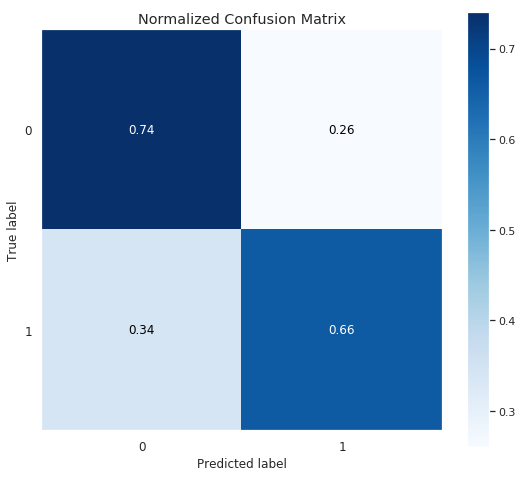

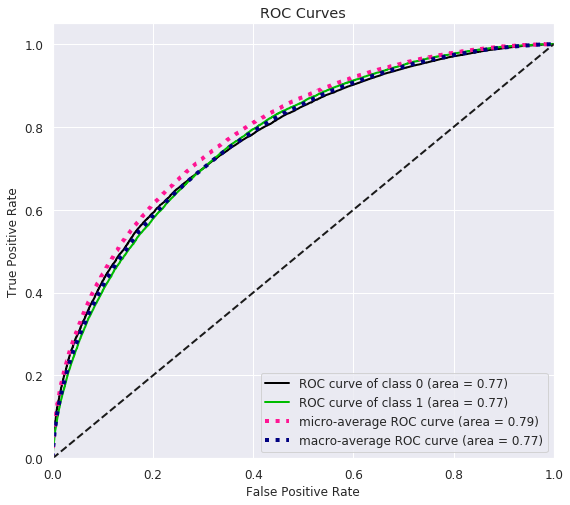

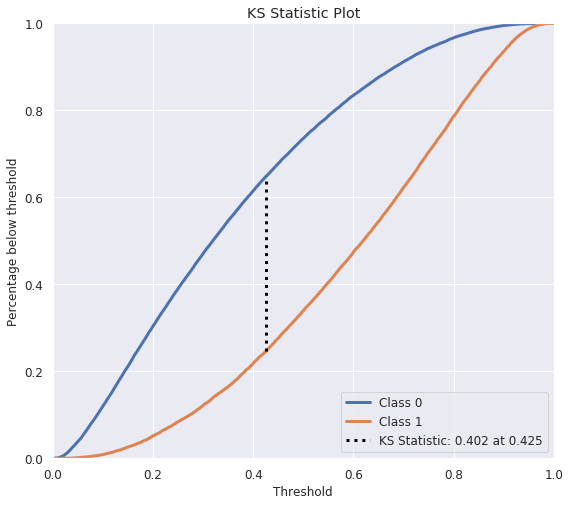

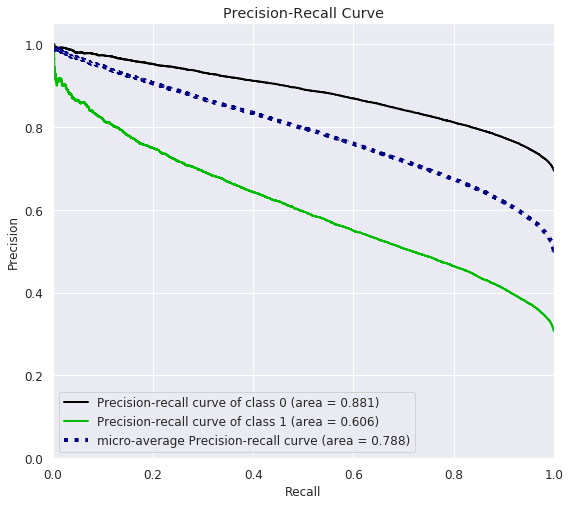

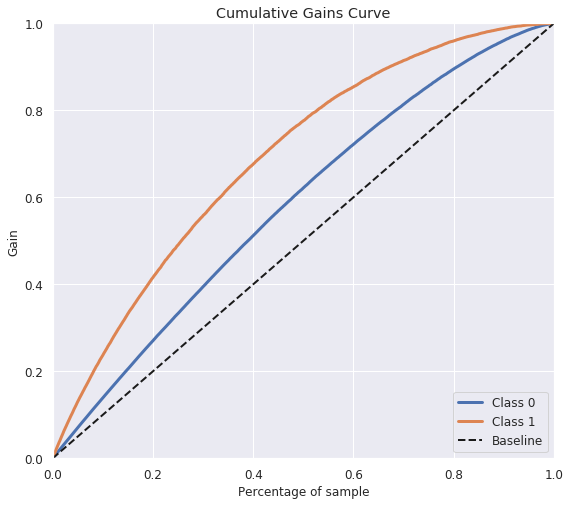

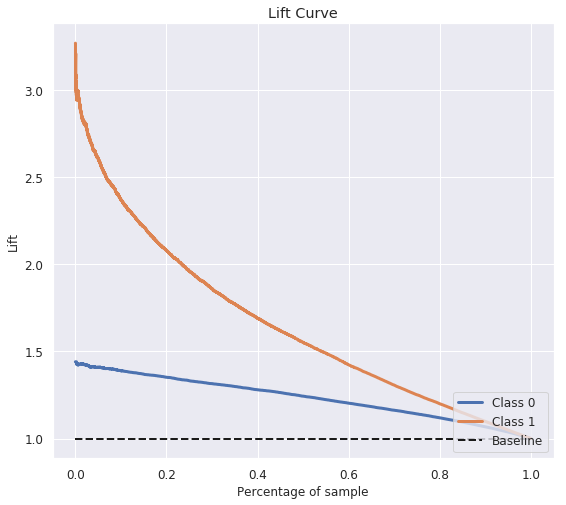

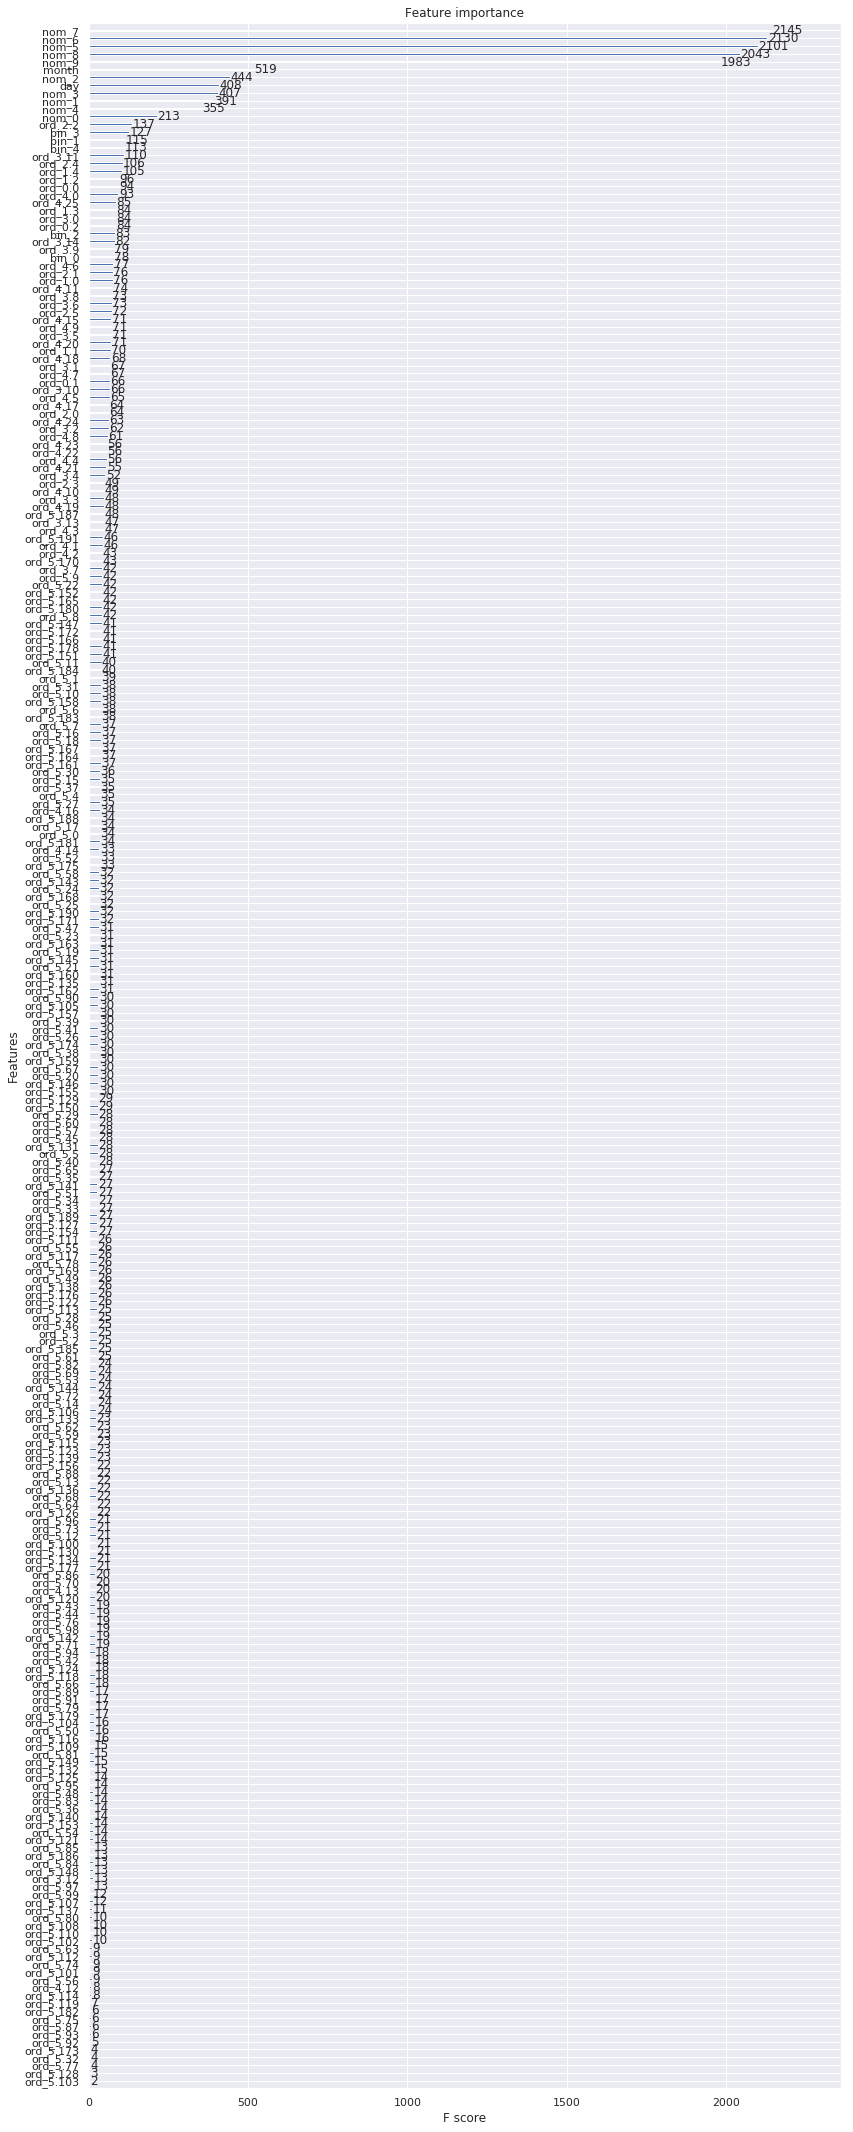

In [32]:
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import time
import seaborn as sns
import scikitplot as skplt

# create a 80/20 split of the data 
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, test_size=0.2, stratify = y)

import xgboost as xgb

start_time = time.time()

predictions_probas_list = np.zeros([len(yvalid), 2])
predictions_test_tuned = np.zeros(len(test_df))
num_of_folds = 2
num_fold = 0
    #feature_importance_df = pd.DataFrame()

folds = StratifiedKFold(n_splits=num_of_folds, shuffle=False, random_state = 42)

for train_index, valid_index in folds.split(xtrain, ytrain):
    xtrain_stra, xvalid_stra = xtrain.iloc[train_index,:], xtrain.iloc[valid_index,:]
    ytrain_stra, yvalid_stra = ytrain.iloc[train_index], ytrain.iloc[valid_index]

    print()
    print("Stratified Fold:", num_fold)
    num_fold = num_fold + 1
    print()

    clf_stra_tuned_xgb = xgb.XGBClassifier(n_estimators = 4000,
                                           objective= 'binary:logistic',
                                           nthread=-1,
                                           eta = best['eta'],
                                           max_depth=int(best['max_depth']),
                                           min_child_weight=best['min_child_weight'],
                                           subsample=best['subsample'],
                                           gamma=best['gamma'],
                                           colsample_bytree=best['colsample_bytree'],
                                           reg_alpha = best['reg_alpha'],
                                           reg_lambda = best['reg_lambda'],
                                           scale_pos_weight = best['scale_pos_weight'],
                                           seed=42)
    

    clf_stra_tuned_xgb.fit(xtrain_stra, ytrain_stra, eval_set=[(xtrain_stra, ytrain_stra), (xvalid_stra, yvalid_stra)], 
                early_stopping_rounds=100, eval_metric='auc', verbose=250)

    #fold_importance_df = pd.DataFrame()
    #fold_importance_df["feature"] = pd.DataFrame.from_dict(data=clf_stra_xgb.get_fscore(), orient="index", columns=["FScore"])["FScore"].index
    #fold_importance_df["fscore"] = pd.DataFrame.from_dict(data=clf_stra_xgb.get_fscore(), orient="index", columns=["FScore"])["FScore"].values
    #fold_importance_df["fold"] = n_fold + 1
    #feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

    predictions = clf_stra_tuned_xgb.predict(xvalid)
    predictions_probas = clf_stra_tuned_xgb.predict_proba(xvalid)
    predictions_probas_list += predictions_probas/num_of_folds

    predictions_test_tuned += clf_stra_tuned_xgb.predict_proba(test_df[xtrain.columns])[:,1]/num_of_folds


predictions = np.argmax(predictions_probas, axis=1)

print()
print(classification_report(yvalid, predictions))

print()
print("CV f1_score", f1_score(yvalid, predictions, average = "macro"))

print()
print("CV roc_auc_score", roc_auc_score(yvalid, predictions_probas_list[:,1], average = "macro"))

print()
print("elapsed time in seconds: ", time.time() - start_time)

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, predictions, normalize=True)

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_roc(yvalid, predictions_probas)

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_ks_statistic(yvalid, predictions_probas)

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_precision_recall(yvalid, predictions_probas)

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_cumulative_gain(yvalid, predictions_probas)

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_lift_curve(yvalid, predictions_probas)

sns.set(rc={'figure.figsize':(12, 38)})
xgb.plot_importance(clf_stra_xgb, title='Feature importance', xlabel='F score', ylabel='Features')

clf_stats_df = clf_stats_df.append({"clf_name": "clf_tuned_xgb",
                     "F1-score":f1_score(yvalid, predictions, average = "macro"),
                     "auc-score": roc_auc_score(yvalid, predictions_probas_list[:,1], average = "macro")}, ignore_index=True)

print()
import gc
gc.collect();

# Inspecting all classifiers and their performance

In [33]:
clf_stats_df

,clf_name,F1-score,auc-score
0,clf_stra_xgb,0.662316,0.777167
1,clf_tuned_xgb,0.682407,0.779661


# Preparing for submission

In [34]:
sub_df['target'] = predictions_test
sub_df.to_csv('clf_xgboost.csv', index=False)

sub_df['target'] = predictions_test_tuned
sub_df.to_csv('clf_xgboost_tuned.csv', index=False)

> Thank you very much for checking out my kernel! Please upvote if you found it helpful or leave a comment if you have any suggestions for improvements.